In [1]:

import os
import sys  

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa
from tqdm import tqdm
import concurrent.futures

sys.path.insert(1, '/home/meow/Projects/kth_music_informatics_project')
from constants import AI_AUDIO_DIR_PATH, HUMAN_AUDIO_DIR_PATH, PARENT_DIR_PATH, CLAP_SR


Be careful Librosa uses 22050 Hz as default sampling rate, so you need to change it to 44100 Hz to get the correct result (what CLAP uses for extraction).

In [2]:

# FOLDER_PATH='/home/meow/Projects/kth_music_informatics_project/rolling_udio/rolling_500'
human_audio_files = os.listdir(os.path.join(PARENT_DIR_PATH,HUMAN_AUDIO_DIR_PATH))
ai_audio_files = os.listdir(os.path.join(PARENT_DIR_PATH,AI_AUDIO_DIR_PATH))

# for audio_file_name in human_audio_files:
#     audio_file_path = os.path.join(PARENT_DIR_PATH,HUMAN_AUDIO_DIR_PATH,audio_file_name)
#     y, sr = librosa.load(audio_file_path)
#     print(y)
#     print(sr)




# shitty code but I don't get paid for this tbf 

ai_mspec = []
ai_mfcc = []
ai_audio_file_lengths = []
def extract_features_ai(audio_file):
    audio_path = os.path.join(PARENT_DIR_PATH, AI_AUDIO_DIR_PATH, audio_file)
    print(f"Processing AI audio file: {audio_file}")
    y, sr = librosa.load(audio_path,sr=CLAP_SR)
    audio_file_length=librosa.get_duration(y=y, sr=sr)
    mspec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mspec), n_mfcc=64)
    return mspec, mfcc ,audio_file_length

# yea srsly 2 lazy to make a function for this that interfaces with multiprocessing map. Have done it before but I need more coffee.
human_mspec = []
human_mfcc = []
human_audio_file_lengths = []

def extract_features_human(audio_file):
    audio_path = os.path.join(PARENT_DIR_PATH, HUMAN_AUDIO_DIR_PATH, audio_file)
    print(f"Processing Human audio file: {audio_file}")
    y, sr = librosa.load(audio_path,sr=CLAP_SR)
    audio_file_length=librosa.get_duration(y=y, sr=sr) # this is in seconds
    mspec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mspec), n_mfcc=64)
    return mspec, mfcc , audio_file_length



# PARALLEL PROCESSING
# print(f'Extracting Mel Spec from {AI_AUDIO_DIR_PATH}')
# with concurrent.futures.ProcessPoolExecutor() as executor:
#     for feature_1, feature_2, dur in tqdm(executor.map(extract_features_ai, ai_audio_files), total=len(ai_audio_files), desc=f'Extracting Features from {AI_AUDIO_DIR_PATH}'):
#         ai_mspec.append(np.array(feature_1, dtype=object))  # Ensure dtype=object to handle variable lengths
#         ai_mfcc.append(np.array(feature_2, dtype=object))   # Ensure dtype=object to handle variable lengths
#         ai_audio_file_lengths.append(dur)

# print('Exited and now Saving AI features')
# np.savez('ai_mspec.npy', *ai_mspec)
# np.savez('ai_mfcc.npy', *ai_mfcc)
# np.save('ai_audio_file_lengths.npy', ai_audio_file_lengths)


# PARALLEL PROCESSING
# print(f'Extracting Mel Spec from {HUMAN_AUDIO_DIR_PATH}')
# with concurrent.futures.ProcessPoolExecutor() as executor:
#     for feature_1, feature_2, dur in tqdm(executor.map(extract_features_human, human_audio_files), total=len(human_audio_files), desc=f'Extracting Features from {HUMAN_AUDIO_DIR_PATH}'):
#         human_mspec.append(feature_1)
#         human_mfcc.append(feature_2)
#         human_mfcc
#         human_audio_file_lengths.append(dur)

# print(f'Extracting Mel Spec from {HUMAN_AUDIO_DIR_PATH}')
# for audio_file in tqdm(human_audio_files, desc=f'Extracting Features from {HUMAN_AUDIO_DIR_PATH}'):
#     feature_1, feature_2, dur = extract_features_human(audio_file)
#     human_mspec.append(feature_1)
#     human_mfcc.append(feature_2)
#     human_audio_file_lengths.append(dur)

# print('Exited and now Saving Human features')
# np.savez('human_mspec.npy', *human_mspec)
# np.savez('human_mfcc.npy', *human_mfcc)
# np.save('human_audio_file_lengths.npy', human_audio_file_lengths)





In [ ]:
# ref: https://stackoverflow.com/questions/62805566/python-how-to-save-lists-of-2d-numpy-arrays-of-different-lengths

# np.savez('ai_mspec', *ai_mspec)
# np.savez('ai_mfcc', *ai_mfcc)
# data = np.load("human_mfcc.npz")
# data[data.files[0]]
# data.files
# list2 = [data[k] for k in data]

#np.save('ai_audio_file_lengths.npy', ai_audio_file_lengths)



# Avg distribution of  powers for Human vs AI generated music for all audio files

As observed it is evident that a generative model would try to replicate the distribution of Human music. The distribution of powers for Human music is more spread out and has a higher peak compared to AI generated music that is bi-modal. Thus, a classifier would capture these differences and classify the audio files accordingly.

How is average energy distributed across different audio files?

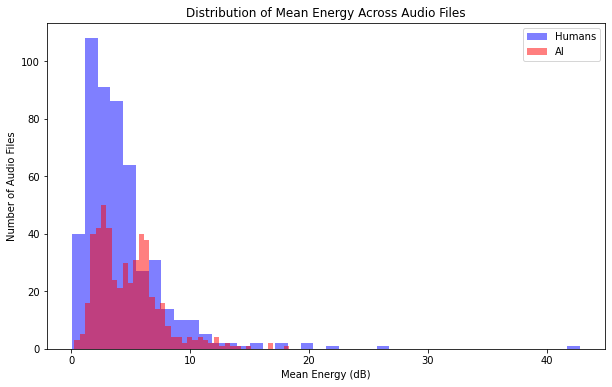

In [5]:
# load the human and ai mel spec features 
# iterature through all of them and calculate the mean frequency for each file
# then calculate the mean frequency for all the files 
# then plot the histogram of the mean frequencies for all the files for both human and ai

# Load the human and AI mel spectrogram features
data = np.load('human_mspec.npz')
human_mspec = [data[k] for k in data]
human_audio_file_lengths = np.load('human_audio_file_lengths.npy')


data = np.load('ai_mspec.npz')
ai_mspec = [data[k] for k in data]
ai_audio_file_lengths = np.load('ai_audio_file_lengths.npy')





#Calculate the mean power for each file
power_means= []
for feature in human_mspec:
    power_means.append(np.mean(feature, axis=1))

# Calculate the mean power for each file
mel_power_means_humans= [np.mean(pow) for pow in power_means]

power_means= []
for feature in ai_mspec:
    power_means.append(np.mean(feature, axis=1))

# Calculate the mean frequency for each file
mel_power_means_ai = [np.mean(pow) for pow in power_means]

eps = 1e-10  # small constant to avoid log(0)
db_means_humans = 10 * np.log10(np.array(mel_power_means_humans) + eps)
db_means_ai = 10 * np.log10(np.array(mel_power_means_ai) + eps)


# # Plot the distribution of mean frequencies
plt.figure(figsize=(10, 6))
plt.hist(mel_power_means_humans, bins=40, color='blue', alpha=0.5, label='Humans')
plt.hist(mel_power_means_ai, bins=40, color='red', alpha=0.5, label='AI')
plt.title('Distribution of Mean Energy Across Audio Files')
plt.legend()
plt.xlabel('Mean Energy (dB)')
plt.ylabel('Number of Audio Files')
plt.savefig('mean_mel_pow_db.png')






# freq_means_ai = []
# for feature in features:
#     freq_means_ai.append(np.mean(feature, axis=1))

# mean_freq_means = [np.mean(freq) for freq in freq_means]

# # Plot the distribution of mean frequencies
# plt.figure(figsize=(10, 6))
# plt.hist(mean_freq_means, bins=40, edgecolor='black')
# plt.title('Distribution of Mean Frequencies for All Human Audio Files')
# plt.xlabel('Mean Frequency')
# plt.ylabel('Count')
# plt.show()


How is energy distributed across different frequency bands?

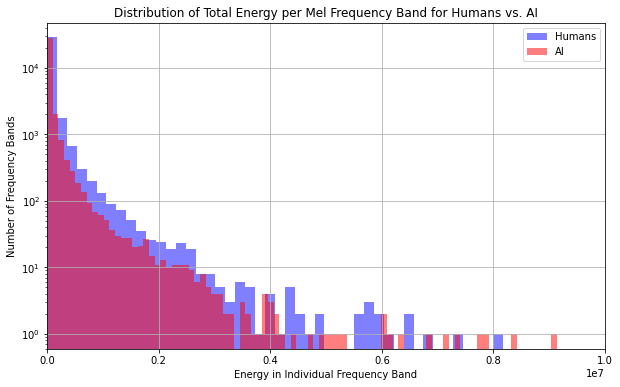

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `human_mspec` and `ai_mspec` are lists of Mel spectrograms for humans and AI

# Step 1: Sum power over time for each Mel frequency band in each spectrogram
summed_power_human = [np.sum(feature, axis=1) for feature in human_mspec]
summed_power_ai = [np.sum(feature, axis=1) for feature in ai_mspec]

# Step 2: Flatten the lists so we have all summed power values for all files
flat_summed_power_human = np.concatenate(summed_power_human)
flat_summed_power_ai = np.concatenate(summed_power_ai)

# Step 3: Create histograms with adjusted binning and axis limits
plt.figure(figsize=(10, 6))

# Histogram for humans
plt.hist(flat_summed_power_human, bins=100, alpha=0.5, label='Humans', color='blue')

# Histogram for AI
plt.hist(flat_summed_power_ai, bins=100, alpha=0.5, label='AI', color='red')

# Step 4: Add titles, labels, and axis limits
plt.title("Distribution of Total Energy per Mel Frequency Band for Humans vs. AI")
#plt.xlabel("Total Energy in Frequency Bands (across Mel Frequencies)")
plt.xlabel("Energy in Individual Frequency Band")
#plt.ylabel("Count")
plt.ylabel("Number of Frequency Bands")

# Set x-axis limit to focus on the main range
plt.xlim(0, 10e6)  # Adjust this based on your data range

# Set logarithmic scale for the y-axis to better visualize low-frequency counts
plt.yscale('log')

# Add legend and grid
plt.legend()
plt.grid(True)
plt.savefig('total_energy_per_mel_freq_band.png')
plt.show()


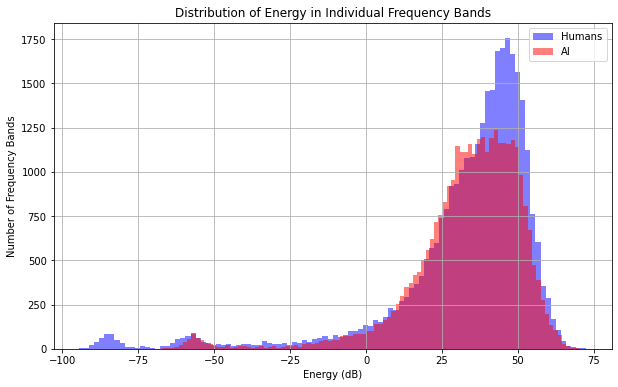

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sum power over time for each Mel frequency band in each spectrogram
summed_power_human = [np.sum(feature, axis=1) for feature in human_mspec]
summed_power_ai = [np.sum(feature, axis=1) for feature in ai_mspec]

# Flatten the lists
flat_summed_power_human = np.concatenate(summed_power_human)
flat_summed_power_ai = np.concatenate(summed_power_ai)

# Convert to decibels (adding small constant to avoid log(0))
eps = 1e-10
db_power_human = 10 * np.log10(flat_summed_power_human + eps)
db_power_ai = 10 * np.log10(flat_summed_power_ai + eps)

# Create plot
plt.figure(figsize=(10, 6))

# Histograms in decibels
plt.hist(db_power_human, bins=100, alpha=0.5, label='Humans', color='blue')
plt.hist(db_power_ai, bins=100, alpha=0.5, label='AI', color='red')

plt.title("Distribution of Energy in Individual Frequency Bands")
plt.xlabel("Energy (dB)")
plt.ylabel("Number of Frequency Bands")

# No need for log scale on y-axis since we converted to dB
# plt.yscale('log')  # Remove this since we're using dB scale

plt.legend()
plt.grid(True)
plt.savefig('energy_in_individual_freq_bands.png')
plt.show()

# Distribution of track lengths for Humans vs Audio

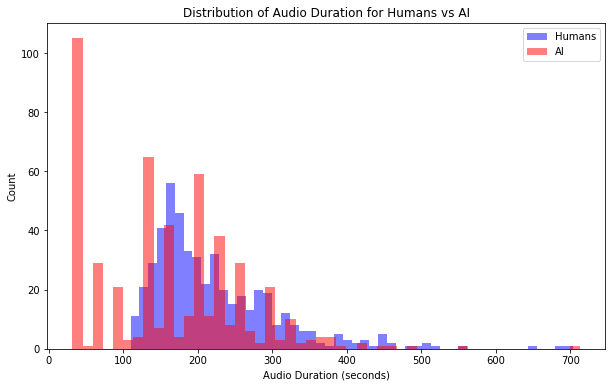

In [7]:
# Load the human and AI audio file lengths
human_audio_file_lengths = np.load('human_audio_file_lengths.npy')
ai_audio_file_lengths = np.load('ai_audio_file_lengths.npy')

# Plot the histogram of the durations for humans vs AI
plt.figure(figsize=(10, 6))
plt.hist(human_audio_file_lengths, bins=50, color='blue', alpha=0.5, label='Humans')
plt.hist(ai_audio_file_lengths, bins=50, color='red', alpha=0.5, label='AI')
plt.title('Distribution of Audio Duration for Humans vs AI')
plt.xlabel('Audio Duration (seconds)')
plt.ylabel('Count')
plt.legend()
plt.savefig('audio_file_lengths.png')
plt.show()



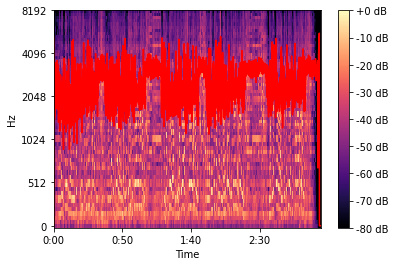

In [35]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
times = librosa.times_like(cent)
#plt.plot(np.mean(mspec, axis=1))
plt.plot(times,cent.T, color='r')
librosa.display.specshow(librosa.power_to_db(mspec, ref=np.max),x_axis='time', y_axis='mel', fmax=8000, sr=sr)
plt.colorbar(format='%+2.0f dB')
# is there any other statistic I could calculate for the audio files?
# calculate spectrall centroid, bandwidth, rolloff, zero crossing rate, chroma, tonnetz, poly features

# calculate spectral centroid
spectral_centroids = []

plt.show()

Hail ChatGPT cause I'm very hungry now.

[[1.2462348e+01]
 [3.4695961e+01]
 [2.8453247e+01]
 [2.2126179e+01]
 [1.2076943e+01]
 [8.2726784e+00]
 [1.3258550e+01]
 [6.4097648e+00]
 [6.3714695e+00]
 [4.5387840e+00]
 [3.7252131e+00]
 [5.7394528e+00]
 [5.2946153e+00]
 [2.8509173e+00]
 [1.3531606e+00]
 [1.4572942e+00]
 [3.2210841e+00]
 [3.6959772e+00]
 [2.1898243e+00]
 [2.1708262e+00]
 [1.6893874e+00]
 [1.1219423e+00]
 [1.1747916e+00]
 [4.7957528e-01]
 [7.0553428e-01]
 [4.8211899e-01]
 [3.5447890e-01]
 [4.9571535e-01]
 [4.6605316e-01]
 [3.4102568e-01]
 [4.5496097e-01]
 [2.0744103e-01]
 [1.5837617e-01]
 [2.4534172e-01]
 [2.4435936e-01]
 [2.0048840e-01]
 [1.3638107e-01]
 [1.0584678e-01]
 [9.0936519e-02]
 [1.0991421e-01]
 [8.0830880e-02]
 [6.3530795e-02]
 [5.5124283e-02]
 [3.7268121e-02]
 [2.9722797e-02]
 [2.4795188e-02]
 [2.1143658e-02]
 [1.5266984e-02]
 [1.0978147e-02]
 [7.5508305e-03]
 [5.0070565e-03]
 [3.8416397e-03]
 [3.3987630e-03]
 [3.5396118e-03]
 [3.0878335e-03]
 [2.8093811e-03]
 [2.2563701e-03]
 [1.4008930e-03]
 [6.0262281e-0

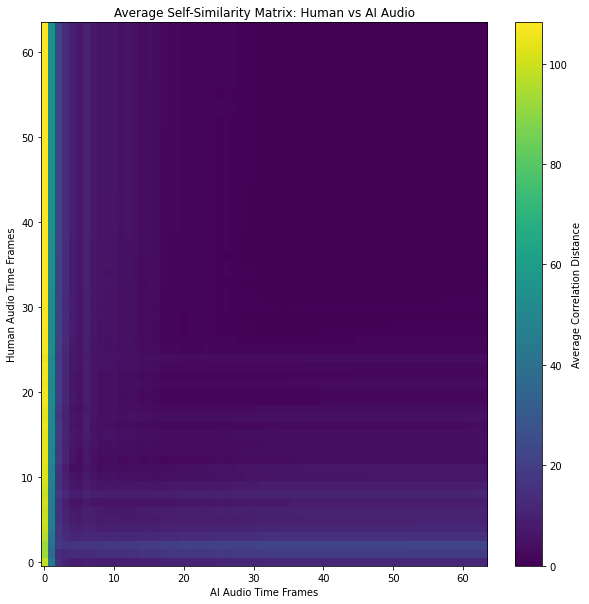

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from concurrent.futures import ProcessPoolExecutor

def prepare_specs_for_comparison(human_mspec, ai_mspec):
    # Take mean across frequency bands (axis=1) for each time frame
    human_means = [np.mean(spec, axis=1) for spec in human_mspec]
    ai_means = [np.mean(spec, axis=1) for spec in ai_mspec]
    return human_means, ai_means

def compute_similarity(human_spec, ai_spec):
    # Make sure they're the same length (you might need to pad or truncate)
    min_length = min(len(human_spec), len(ai_spec))
    if min_length == 0:
        print("Error: Empty spectrogram encountered.")

    human_spec = human_spec[:min_length]
    ai_spec = ai_spec[:min_length]

    print(human_spec.reshape(-1, 1))
    print(ai_spec.reshape(-1, 1))
    # Calculate similarity matrix using vectorized operation (correlation distance)
    sim_matrix = cdist(
        human_spec.reshape(-1, 1), 
        ai_spec.reshape(-1, 1), 
        metric='euclidean'
    )
    return sim_matrix

def compute_average_similarity_parallel(human_mspec, ai_mspec, n_samples=10):
    human_means, ai_means = prepare_specs_for_comparison(human_mspec, ai_mspec)


    # Optionally, reduce the number of comparisons by sampling
    human_means = human_means[:n_samples]  # Sample a subset of human spectrograms

    ai_means = ai_means[:n_samples]        # Sample a subset of AI spectrograms

    all_similarities = []

    # Parallelize the similarity computation
    with ProcessPoolExecutor() as executor:
        futures = []
        for human_spec in human_means:
            for ai_spec in ai_means:
                futures.append(executor.submit(compute_similarity, human_spec, ai_spec))
        
        # Collect the results
        for future in futures:
            all_similarities.append(future.result())

    #print(all_similarities)

    # Calculate average similarity matrix across all comparisons
    average_similarity = np.mean(all_similarities, axis=0)

    return average_similarity

# Calculate and plot average similarity with parallel processing
avg_similarity = compute_average_similarity_parallel(human_mspec, ai_mspec, n_samples=10)

plt.figure(figsize=(10, 10))
plt.imshow(avg_similarity, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Average Correlation Distance')
plt.title('Average Self-Similarity Matrix: Human vs AI Audio')
plt.xlabel('AI Audio Time Frames')
plt.ylabel('Human Audio Time Frames')
plt.savefig('sim.png')
plt.show()


In [25]:
import numpy as np
import librosa
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Function to prepare the spectrograms for comparison
def prepare_specs_for_comparison(human_mspec, ai_mspec):
    human_means = [np.mean(spec, axis=1) for spec in human_mspec]
    ai_means = [np.mean(spec, axis=1) for spec in ai_mspec]
    return human_means, ai_means

# Function to compute DTW similarity between human and AI samples
# Function to compute DTW similarity between human and AI samples
def compute_dtw_similarity(human_spec, ai_spec):
    min_length = min(len(human_spec), len(ai_spec))
    human_spec = human_spec[:min_length]
    ai_spec = ai_spec[:min_length]
    
    # No need to flatten; they're already 1D after averaging
    # Compute DTW distance using fastdtw
    distance, path = fastdtw(human_spec, ai_spec, dist=euclidean)
    return distance


# Function to calculate average similarity using DTW
def compute_average_dtw_similarity(human_mspec, ai_mspec):
    human_means, ai_means = prepare_specs_for_comparison(human_mspec, ai_mspec)
    
    all_dtw_distances = []
    
    # Compare each human sample with each AI sample
    for human_spec in human_means:
        for ai_spec in ai_means:
            distance = compute_dtw_similarity(human_spec, ai_spec)
            all_dtw_distances.append(distance)
    
    # Calculate average DTW distance
    avg_dtw_distance = np.mean(all_dtw_distances)
    
    return avg_dtw_distance

# Now let's compute the average DTW distance between human and AI audio features
avg_dtw_distance = compute_average_dtw_similarity(human_mspec, ai_mspec)

print(f"Average DTW Distance (Human vs AI): {avg_dtw_distance}")

# You can visualize the DTW distance if needed (optional)
# This could involve showing a path alignment plot using librosa.display or other visualizations


ValueError: Input vector should be 1-D.

In [22]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.7 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3565 sha256=823c20ec61d8a98fd716eabe8fc91c7c7bacd0e5c88afa006bd447736a02d48c
  Stored in directory: /home/meow/.cache/pip/wheels/1f/a1/63/bfd0fddb5bf0b59f564872e29272cee8a2de0cd745d88fede5
Successfully built fastdtw
